In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class KMeansManual:
    def __init__(self, n_clusters=4, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def fit(self, X):
        # Başlangıç küme merkezlerini rastgele seç
        if self.random_state:
            np.random.seed(self.random_state)
        initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[initial_indices]

        for i in range(self.max_iter):
            # 1. Adım: Her noktayı en yakın küme merkezine ata
            labels = self._assign_clusters(X, centroids)

            # 2. Adım: Yeni küme merkezlerini hesapla
            new_centroids = np.array([self._compute_centroid(X[labels == j]) for j in range(self.n_clusters)])

            # Küme merkezleri arasında değişim
            shift = self._calculate_shift(new_centroids, centroids)

            # Eğer değişim belirtilen toleransın altına düşerse, algoritmayı durdur
            if shift < self.tol:
                print(f"Converged after {i+1} iterations.")
                break

            centroids = new_centroids

        self.centroids_ = centroids
        self.labels_ = labels

    def _assign_clusters(self, X, centroids):
        # Öklid mesafesini manuel olarak hesapla ve her nokta için en yakın küme merkezini ata
        labels = []
        for point in X:
            distances = [self._euclidean_distance(point, centroid) for centroid in centroids]
            labels.append(np.argmin(distances))
        return np.array(labels)

    def _compute_centroid(self, points):
        # Verilen noktalar için merkez (ortalama) hesapla
        return np.mean(points, axis=0)

    def _euclidean_distance(self, point1, point2):
        # İki nokta arasındaki Öklid mesafesini manuel hesaplama
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def _calculate_shift(self, new_centroids, centroids):
        # Merkezler arasındaki mesafeyi hesapla (değişim)
        shifts = [self._euclidean_distance(new, old) for new, old in zip(new_centroids, centroids)]
        return np.sum(shifts)

In [4]:
def load_and_cluster_data(csv_path, feature_columns, n_clusters=4, random_state=111):
    # CSV dosyasını oku
    df = pd.read_csv(csv_path, sep=';') # Specify the semicolon delimiter

    # Seçilen özellikleri al
    X = df[feature_columns].values

    # KMeans algoritmasını uygula
    algorithm = KMeansManual(n_clusters=n_clusters, random_state=random_state)
    algorithm.fit(X)

    # Sonuçları görselleştir
    plt.figure(figsize=(10, 8))
    for i in range(n_clusters):
        plt.scatter(X[algorithm.labels_ == i, 0],
                    X[algorithm.labels_ == i, 1],
                    label=f"Cluster {i+1}",
                    s=30)

    plt.scatter(algorithm.centroids_[:, 0],
                algorithm.centroids_[:, 1],
                c='black',
                marker='x',
                s=200,
                label='Centroids')

    plt.title("Manual KMeans Clustering")
    plt.xlabel(feature_columns[0])
    plt.ylabel(feature_columns[1])
    plt.legend()
    plt.grid(True)
    plt.show()

    return algorithm

Converged after 10 iterations.


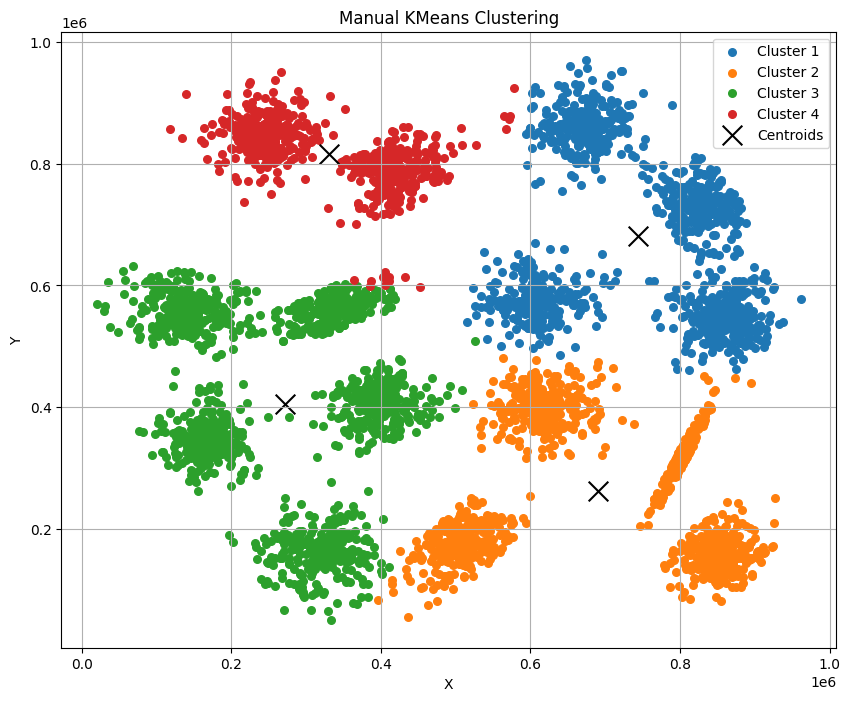

In [5]:
# Kullanım örneği
load_and_cluster_data('/content/S1_.csv', ['X','Y'])

In [6]:
df=pd.read_csv('/content/S1_.csv', sep=';')
df.head()

,X,Y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
